In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#환율 매매기준율(기준환율)에 대한 정의 
# https://korealtyusa.com/매매기준율/

In [3]:
# 데이터 출처 : 한국은행 경제통계시스템 
# https://ecos.bok.or.kr/#/SearchStat

In [4]:
df = pd.read_excel('data/Currency.xlsx', index_col=0)

In [5]:
df.tail()

,"M2(평잔, 원계열)","M2 (말잔,원계열)","M1 (평잔, 원계열)","M1 (말잔, 원계열)"
항목명1,,,,
2022/03,3672133.4,3652818.7,1370237.5,1381077.5
2022/04,3675828.7,3673715.3,1377050.8,1380658.0
2022/05,3694489.3,3699349.5,1374671.3,1386374.8
2022/06,3714135.0,3702913.2,1386071.5,1401276.6
2022/07,3720324.1,3718139.9,1366219.8,1344145.6


In [6]:
# 평잔 데이터를 볼 예정
df_2 = df[['M1 (평잔, 원계열)', 'M2(평잔, 원계열)']]
df_2.columns = ['M1', 'M2']

In [7]:
df_2.head()

,M1,M2
항목명1,,
2001/01,200074.9,711867.7
2001/02,201160.7,716583.9
2001/03,206680.3,717847.3
2001/04,204714.3,718780.3
2001/05,204840.0,723359.5


In [8]:
#index 를 datetime 형식으로 변경 (추후에 편한 정렬 및 loc 를 위해)
df_2.index = pd.to_datetime(df_2.index)
df_2 = df_2.sort_index()

In [9]:
df_2.index

DatetimeIndex(['2001-01-01', '2001-02-01', '2001-03-01', '2001-04-01',
               '2001-05-01', '2001-06-01', '2001-07-01', '2001-08-01',
               '2001-09-01', '2001-10-01',
               ...
               '2021-10-01', '2021-11-01', '2021-12-01', '2022-01-01',
               '2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01',
               '2022-06-01', '2022-07-01'],
              dtype='datetime64[ns]', name='항목명1', length=259, freq=None)

In [10]:
df_2.head()

,M1,M2
항목명1,,
2001-01-01,200074.9,711867.7
2001-02-01,201160.7,716583.9
2001-03-01,206680.3,717847.3
2001-04-01,204714.3,718780.3
2001-05-01,204840.0,723359.5


In [11]:
# 연도, 월, 일, 분기를 따로 저장
df_2['일자'] = df_2.index

In [12]:
df_2['연'] = df_2['일자'].dt.year
df_2['월'] = df_2['일자'].dt.month
df_2['분기'] = df_2['일자'].dt.quarter

In [13]:
df_2.head()

,M1,M2,일자,연,월,분기
항목명1,,,,,,
2001-01-01,200074.9,711867.7,2001-01-01,2001,1,1
2001-02-01,201160.7,716583.9,2001-02-01,2001,2,1
2001-03-01,206680.3,717847.3,2001-03-01,2001,3,1
2001-04-01,204714.3,718780.3,2001-04-01,2001,4,2
2001-05-01,204840.0,723359.5,2001-05-01,2001,5,2


In [14]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 259 entries, 2001-01-01 to 2022-07-01
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   M1      259 non-null    float64       
 1   M2      259 non-null    float64       
 2   일자      259 non-null    datetime64[ns]
 3   연       259 non-null    int64         
 4   월       259 non-null    int64         
 5   분기      259 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 14.2 KB


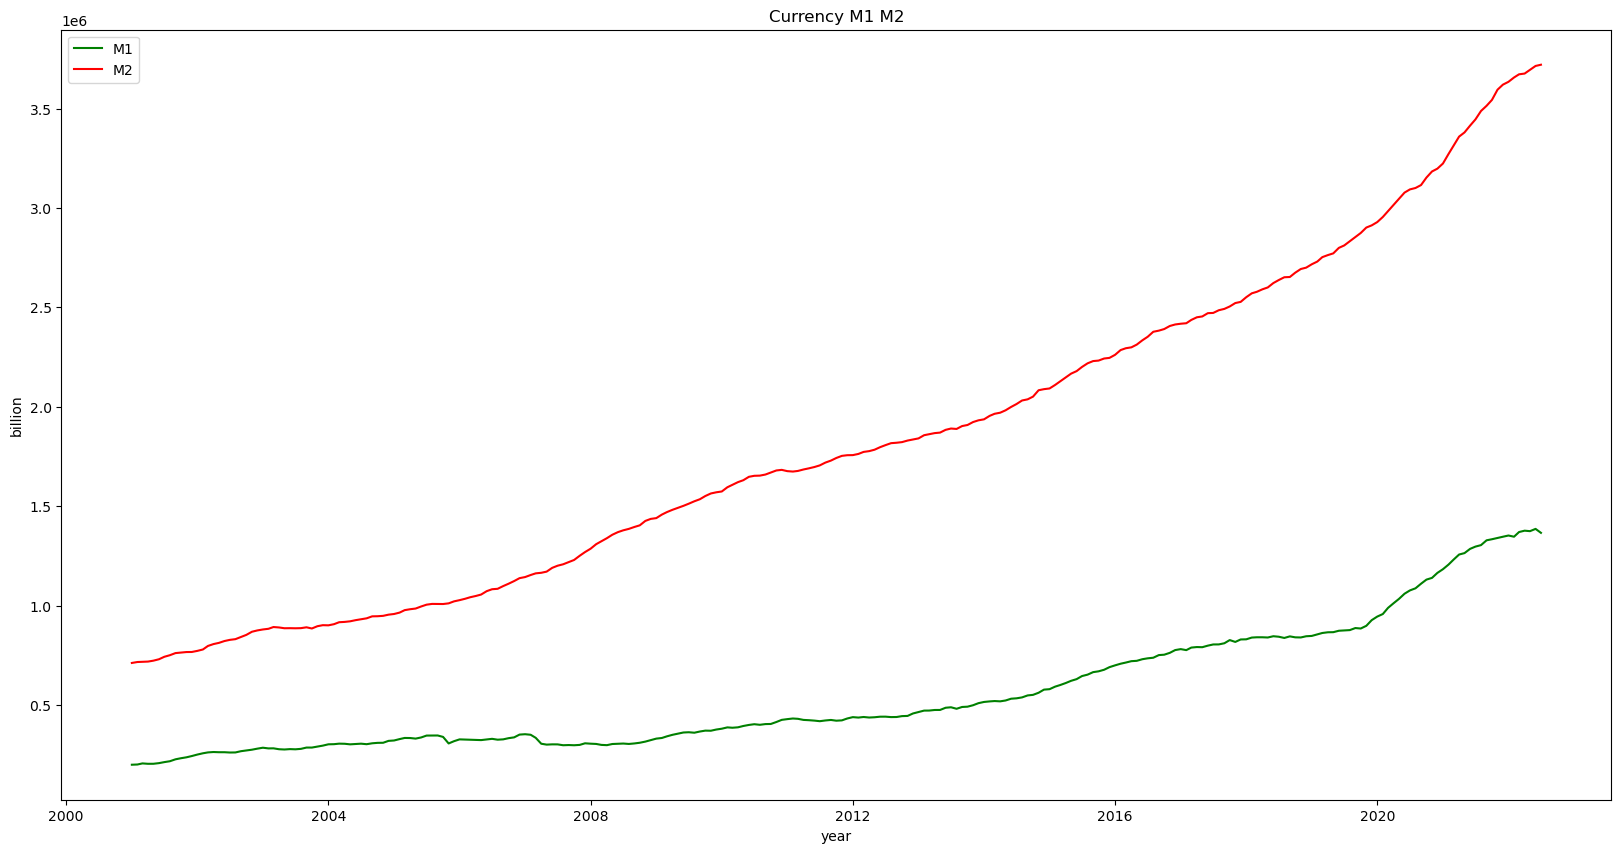

In [15]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)


ax.plot(df_2.index, df_2['M1'], label='M1' , color='g')
ax.plot(df_2.index, df_2['M2'], label='M2', color='r')


ax.set_xlabel("year")
ax.set_ylabel("billion")
ax.set_title("Currency M1 M2")


#한글폰트 지정
#plt.rc('font', family='NanumGothic')
plt.legend(loc='best')
plt.show()

In [16]:
df_2['전년동월M1'] = df_2['M1'].shift(12)
df_2['전년동월M2'] = df_2['M2'].shift(12)

In [17]:
#전년 동월의 통화량이 높은 것이 있는지 확인해보았다.
df_comp = df_2[(df_2['전년동월M1'] > df_2['M1'])  ]

In [18]:
df_comp.info()
#아래와 같이 총 24개 월이 있었다. M2 확인 결과, 전년 동월이 높은 경우는 없었음. 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24 entries, 2005-11-01 to 2008-04-01
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   M1      24 non-null     float64       
 1   M2      24 non-null     float64       
 2   일자      24 non-null     datetime64[ns]
 3   연       24 non-null     int64         
 4   월       24 non-null     int64         
 5   분기      24 non-null     int64         
 6   전년동월M1  24 non-null     float64       
 7   전년동월M2  24 non-null     float64       
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 1.7 KB


In [19]:
df_2['전년동월M1증감율'] = ( (df_2['M1'] - df_2['전년동월M1'] ) / df_2['전년동월M1'] ) *100
df_2['전년동월M2증감율'] = ( (df_2['M2'] - df_2['전년동월M2'] ) / df_2['전년동월M2'] ) *100

In [20]:
df_2.tail()

,M1,M2,일자,연,월,분기,전년동월M1,전년동월M2,전년동월M1증감율,전년동월M2증감율
항목명1,,,,,,,,,,
2022-03-01,1370237.5,3672133.4,2022-03-01,2022,3,1,1231321.1,3313182.2,11.281899,10.834031
2022-04-01,1377050.8,3675828.7,2022-04-01,2022,4,2,1257170.1,3358874.9,9.535758,9.436309
2022-05-01,1374671.3,3694489.3,2022-05-01,2022,5,2,1264219.8,3379753.9,8.736732,9.312376
2022-06-01,1386071.5,3714135.0,2022-06-01,2022,6,2,1285488.7,3413899.8,7.824480,8.794494
2022-07-01,1366219.8,3720324.1,2022-07-01,2022,7,3,1296969.0,3445243.0,5.339434,7.984374


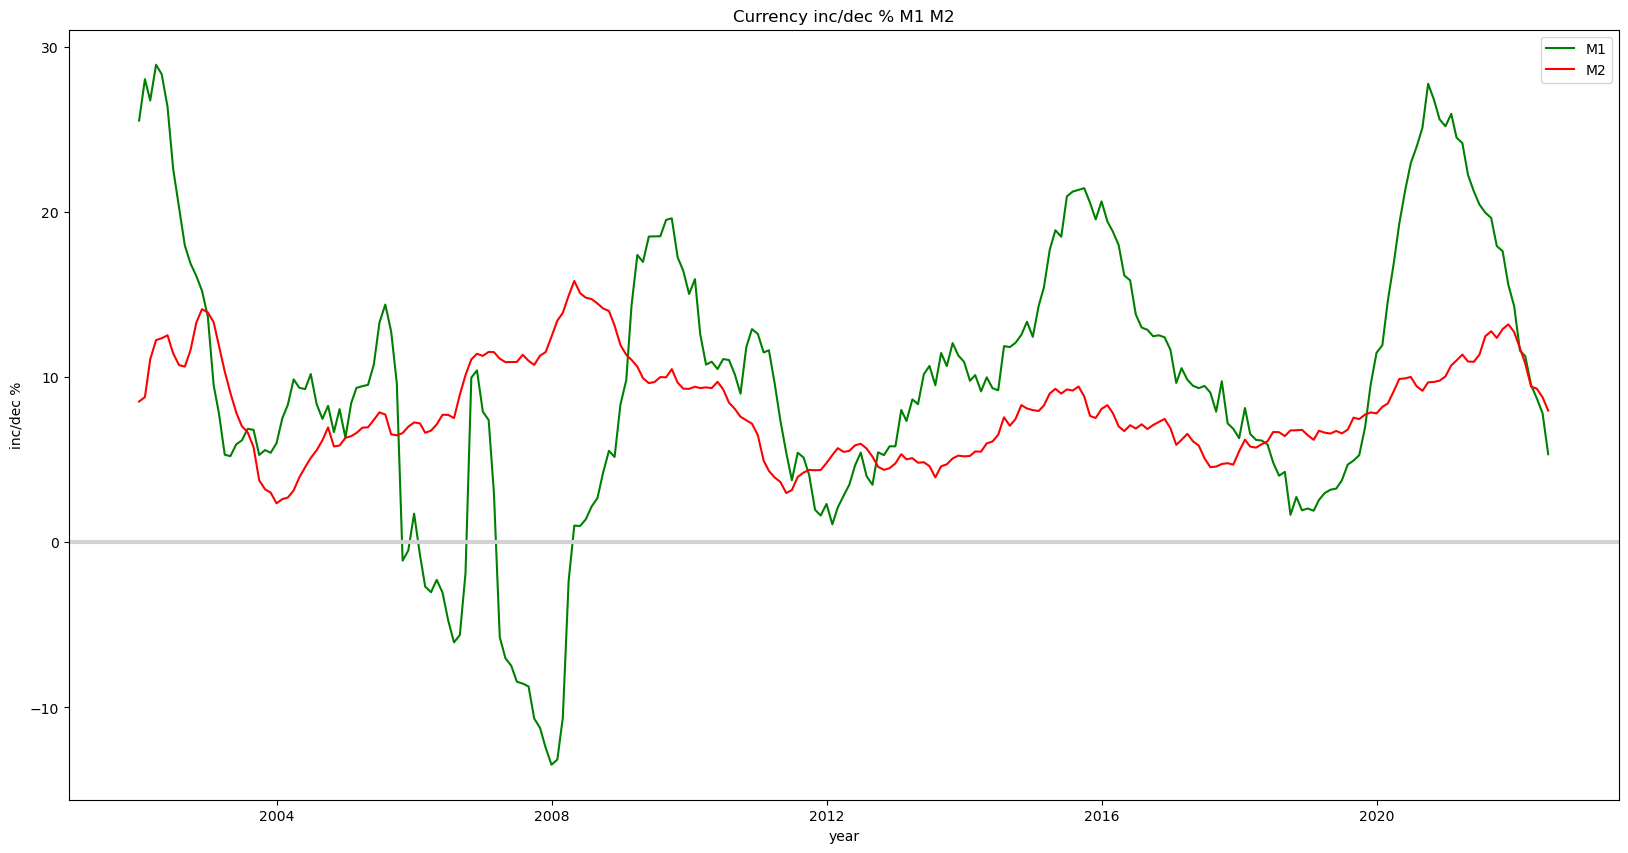

In [21]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)


ax.plot(df_2.index, df_2['전년동월M1증감율'], label='M1' , color='g')
ax.plot(df_2.index, df_2['전년동월M2증감율'], label='M2', color='r')


ax.set_xlabel("year")
ax.set_ylabel("inc/dec %")
ax.set_title("Currency inc/dec % M1 M2")

ax.axhline(0, 0,1, color='lightgray', linestyle='solid', linewidth=3)


#한글폰트 지정
#plt.rc('font', family='NanumGothic')
plt.legend(loc='best')
plt.show()

In [23]:
df_by = pd.read_excel('data/M2 경제주체별 보유현황(평잔, 원계열).xlsx', skiprows=1 , index_col=0)

In [24]:
df_by.head()

,"M2(평잔, 원계열)",가계 및 비영리단체 1),기업 2),기타금융기관 3),기타부문 4)
계정항목,,,,,
2001/12,767051.1,468715.2,186504.1,65745.3,46086.5
2002/01,772614.7,475372.5,187174.9,65289.4,44778.0
2002/02,779654.9,486739.1,179673.4,68997.4,44245.0
2002/03,797428.3,483559.6,192732.1,74111.5,47025.0
2002/04,806857.1,490482.0,194034.9,73675.8,48664.4


In [25]:
df_by.columns = ['M2(평잔, 원계열)', '가계/비영리단체', '기업', '기타금융기관', '기타']

In [26]:
df_by.head()

,"M2(평잔, 원계열)",가계/비영리단체,기업,기타금융기관,기타
계정항목,,,,,
2001/12,767051.1,468715.2,186504.1,65745.3,46086.5
2002/01,772614.7,475372.5,187174.9,65289.4,44778.0
2002/02,779654.9,486739.1,179673.4,68997.4,44245.0
2002/03,797428.3,483559.6,192732.1,74111.5,47025.0
2002/04,806857.1,490482.0,194034.9,73675.8,48664.4


In [27]:
df_by.info()

<class 'pandas.core.frame.DataFrame'>
Index: 248 entries, 2001/12 to 2022/07
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   M2(평잔, 원계열)  248 non-null    float64
 1   가계/비영리단체     248 non-null    float64
 2   기업           248 non-null    float64
 3   기타금융기관       248 non-null    float64
 4   기타           248 non-null    float64
dtypes: float64(5)
memory usage: 11.6+ KB


In [28]:
df_by.index = pd.to_datetime(df_by.index)
df_by = df_by.sort_index()

In [29]:
type(df_by.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [30]:
df_by['년월'] = df_by.index

In [31]:
df_by.head()

,"M2(평잔, 원계열)",가계/비영리단체,기업,기타금융기관,기타,년월
계정항목,,,,,,
2001-12-01,767051.1,468715.2,186504.1,65745.3,46086.5,2001-12-01
2002-01-01,772614.7,475372.5,187174.9,65289.4,44778.0,2002-01-01
2002-02-01,779654.9,486739.1,179673.4,68997.4,44245.0,2002-02-01
2002-03-01,797428.3,483559.6,192732.1,74111.5,47025.0,2002-03-01
2002-04-01,806857.1,490482.0,194034.9,73675.8,48664.4,2002-04-01


In [32]:
df_by['연'] = df_by['년월'].dt.year
df_by['월'] = df_by['년월'].dt.month
df_by['분기'] = df_by['년월'].dt.quarter

In [33]:
df_by.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 248 entries, 2001-12-01 to 2022-07-01
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   M2(평잔, 원계열)  248 non-null    float64       
 1   가계/비영리단체     248 non-null    float64       
 2   기업           248 non-null    float64       
 3   기타금융기관       248 non-null    float64       
 4   기타           248 non-null    float64       
 5   년월           248 non-null    datetime64[ns]
 6   연            248 non-null    int64         
 7   월            248 non-null    int64         
 8   분기           248 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(3)
memory usage: 19.4 KB


In [34]:
df_by.head(10)

,"M2(평잔, 원계열)",가계/비영리단체,기업,기타금융기관,기타,년월,연,월,분기
계정항목,,,,,,,,,
2001-12-01,767051.1,468715.2,186504.1,65745.3,46086.5,2001-12-01,2001,12,4
2002-01-01,772614.7,475372.5,187174.9,65289.4,44778.0,2002-01-01,2002,1,1
2002-02-01,779654.9,486739.1,179673.4,68997.4,44245.0,2002-02-01,2002,2,1
2002-03-01,797428.3,483559.6,192732.1,74111.5,47025.0,2002-03-01,2002,3,1
2002-04-01,806857.1,490482.0,194034.9,73675.8,48664.4,2002-04-01,2002,4,2
2002-05-01,812805.7,488802.4,194827.5,77922.7,51253.0,2002-05-01,2002,5,2
2002-06-01,822108.1,491900.3,195413.7,79384.0,55410.0,2002-06-01,2002,6,2
2002-07-01,827976.7,494945.5,198579.6,78310.7,56140.9,2002-07-01,2002,7,3
2002-08-01,831521.4,499379.4,197772.3,77399.3,56970.4,2002-08-01,2002,8,3


In [35]:
df_by['전년동월M2(가계/비영리단체)'] = df_by['가계/비영리단체'].shift(12)
df_by['전년동월M2(기업)'] = df_by['기업'].shift(12)

In [36]:
df_by['전년동월M2증감율(가계/비영리단체)'] =  (df_by['가계/비영리단체'] - df_by['전년동월M2(가계/비영리단체)']) / df_by['전년동월M2(가계/비영리단체)'] * 100
df_by['전년동월M2증감율(기업)'] =  (df_by['기업'] - df_by['전년동월M2(기업)']) / df_by['전년동월M2(기업)'] * 100

In [37]:
df_by.head()

,"M2(평잔, 원계열)",가계/비영리단체,기업,기타금융기관,기타,년월,연,월,분기,전년동월M2(가계/비영리단체),전년동월M2(기업),전년동월M2증감율(가계/비영리단체),전년동월M2증감율(기업)
계정항목,,,,,,,,,,,,,
2001-12-01,767051.1,468715.2,186504.1,65745.3,46086.5,2001-12-01,2001,12,4,NaN,NaN,NaN,NaN
2002-01-01,772614.7,475372.5,187174.9,65289.4,44778.0,2002-01-01,2002,1,1,NaN,NaN,NaN,NaN
2002-02-01,779654.9,486739.1,179673.4,68997.4,44245.0,2002-02-01,2002,2,1,NaN,NaN,NaN,NaN
2002-03-01,797428.3,483559.6,192732.1,74111.5,47025.0,2002-03-01,2002,3,1,NaN,NaN,NaN,NaN
2002-04-01,806857.1,490482.0,194034.9,73675.8,48664.4,2002-04-01,2002,4,2,NaN,NaN,NaN,NaN


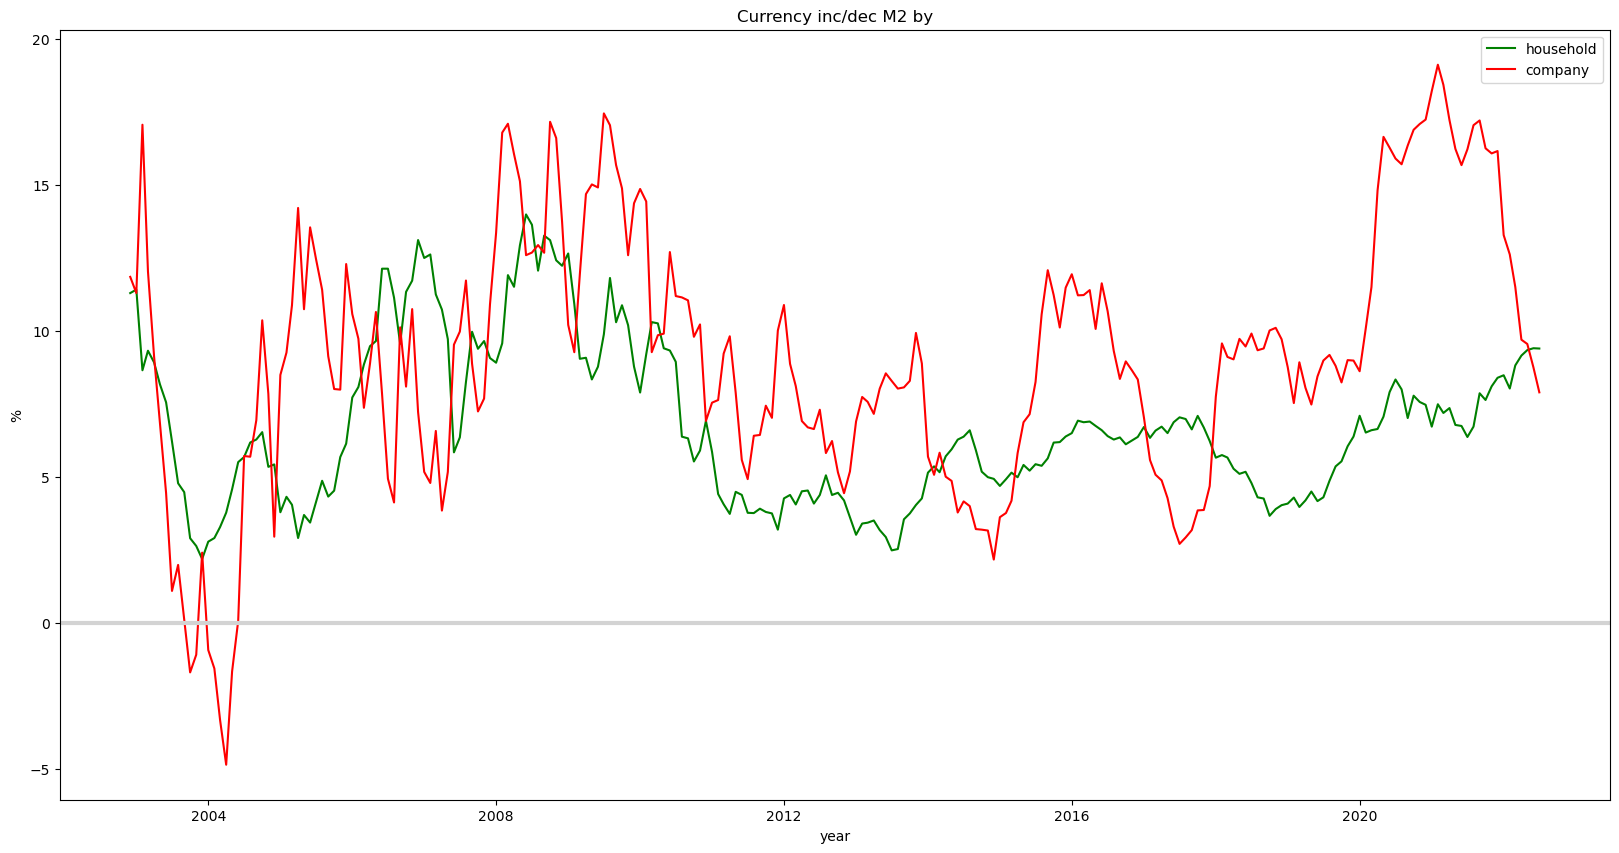

In [38]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)


ax.plot(df_by.index, df_by['전년동월M2증감율(가계/비영리단체)'], label='household' , color='g')
ax.plot(df_by.index, df_by['전년동월M2증감율(기업)'], label='company', color='r')
#ax.plot(df_by.index, df_by['전년동월M2증감율(기타금융기관)'], label='etc-finance' , color='b')
#ax.plot(df_by.index, df_by['전년동월M2증감율(기타)'], label='etc', color='pink')


ax.set_xlabel("year")
ax.set_ylabel("%")
ax.set_title("Currency inc/dec M2 by")

ax.axhline(0, 0,1, color='lightgray', linestyle='solid', linewidth=3)


#한글폰트 지정
#plt.rc('font', family='NanumGothic')
plt.legend(loc='best')
plt.show()

In [39]:
df_by_year = df_by.groupby('연')

In [40]:
a1 = df_by_year['가계/비영리단체'].sum() / df_by_year['M2(평잔, 원계열)'].sum() * 100
a2 = df_by_year['기업'].sum() / df_by_year['M2(평잔, 원계열)'].sum() * 100
a3 = df_by_year['기타금융기관'].sum() / df_by_year['M2(평잔, 원계열)'].sum() * 100
a4 = df_by_year['기타'].sum() / df_by_year['M2(평잔, 원계열)'].sum() * 100

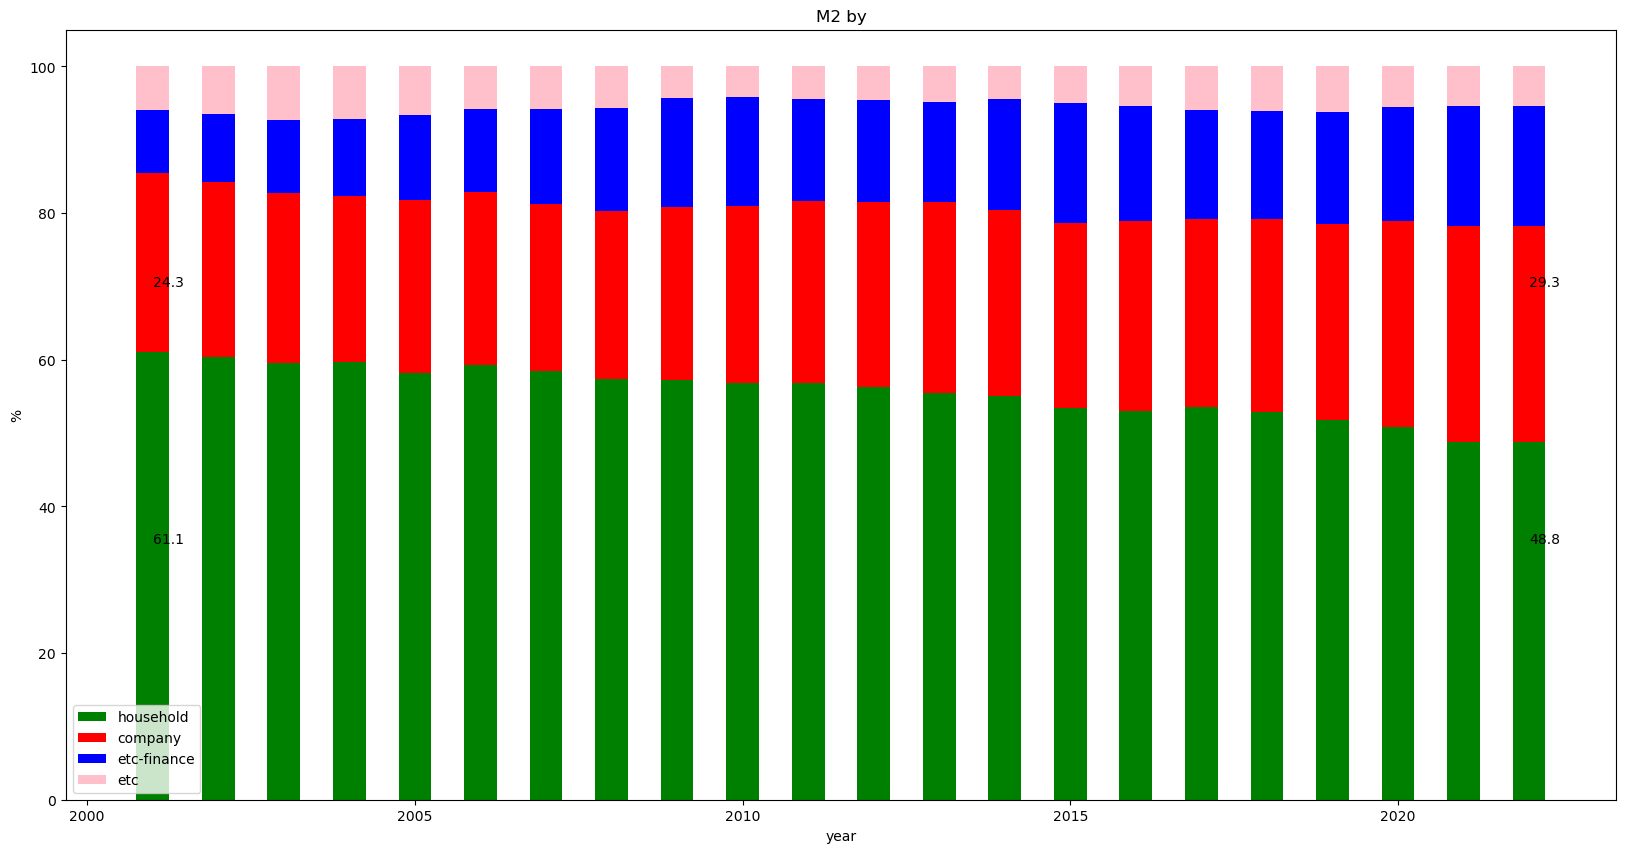

In [41]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)


ax.bar(a1.index, a1, label='household' , color='g', width=0.5 )
ax.bar(a2.index, a2, label='company', color='r', bottom = a1 , width=0.5 )
ax.bar(a3.index, a3, label='etc-finance' , color='b' , bottom = a1 + a2  , width=0.5)
ax.bar(a4.index, a4, label='etc', color='pink' , bottom = a1 + a2 + a3 , width=0.5)


ax.set_xlabel("year")
ax.set_ylabel("%")
ax.set_title("M2 by")

ax.text(2001, 35, '61.1')
ax.text(2022, 35, '48.8')

ax.text(2001, 70, '24.3')
ax.text(2022, 70, '29.3')

#한글폰트 지정
#plt.rc('font', family='NanumGothic')
plt.legend(loc='best')
plt.show()

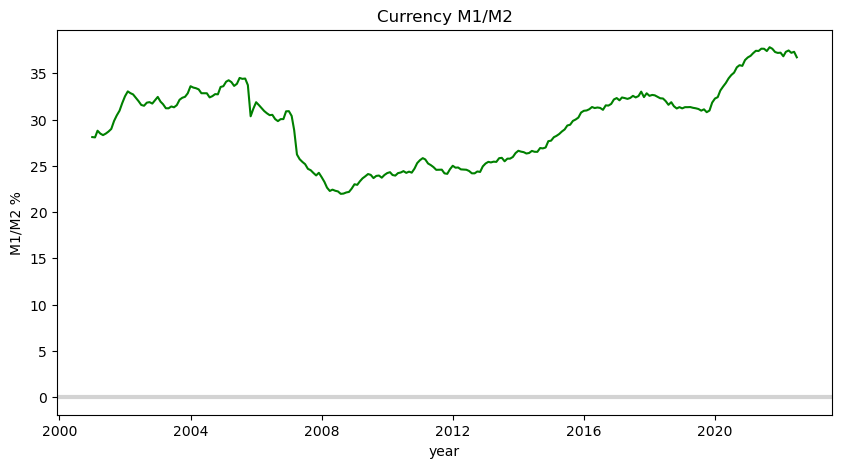

In [42]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)


ax.plot(df_2.index, df_2['M1']/df_2['M2'] * 100,  color='g')

ax.set_xlabel("year")
ax.set_ylabel("M1/M2 %")
ax.set_title("Currency M1/M2")

ax.axhline(0, 0,1, color='lightgray', linestyle='solid', linewidth=3)

plt.show()

In [43]:
#resample, 좌우, Y 축 변환 
#26.50
#M1/M2 기준점 찾기